### **Course**: BIO-341 [_Dynamical systems in biology_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Julian Shillcock_ & _Felix Naef_

SSV, BA5, 2024

Note that this document is primarily aimed at being consulted as a Jupyter notebook, the PDF rendering being not optimal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.linear_model import LinearRegression

# Ex 1


The sine map is defined by the iteration scheme:
\begin{equation}
    X_{n+1} = r \sin(\pi X_n)
\end{equation}
For a constant parameter $ 0 < r < 1 $, and an initial value that satisfies $ 0 < x_0 < 1 $.


Write a Python code that iterates the above map, given the parameters: $ r $, the number of iterations $ N $, and an initial point $ x_0 $. The code should either write the iterates to a file for later plotting, or plot them directly. Use 2000 iterations and discard the first 1000 points for plotting or calculations to remove the initial transients in the map.

In order to find the fixed point we want to find the point $x_{FP}$ such that:
$$
X_{FP} = r sin( \pi X_{FP})
$$
One solution of the equation is obviously 0, for the other ones (if any), we need to use numerical approaches

In [2]:
from scipy.optimize import fsolve
import numpy as np

def sin_map(x, r):
    '''
    Sinusoidal map
    '''
    return r * np.sin(np.pi * x)

def sin_map_prime(x, r):
    '''
    Derivative of the sinusoidal map
    '''
    return r * np.pi * np.cos(np.pi * x)

def equation(x, r):
    return sin_map(x,r) - x

def find_fixed_point(r):
    initial_guess = 0.7
    return fsolve(equation, initial_guess, args=(r,))


## Ex 1.1

Wrap the iteration function in a loop over a user-defined range of r values, and plot all the iterates for each r value in the same graph. It should start to look like the figure below, i.e., for each value of r, all the iterates produced from the initial value x0 should be plotted vertically. If you want, you can change the value of x0 for each value of r, but because the map is “chaotic”, it doesn’t really matter. NB. Don’t use x0 = 0, or 1!

In [3]:
def trajectory(r, N, x0):
    '''
    Compute the trajectory of the sinusoidal map
    '''
    x = np.zeros(N)
    x[0] = x0
    for i in range(1, N):
        x[i] = sin_map(x[i-1], r)
    return x

For this exercise we just need to run the trajectory function for different values of r.   
Notice how we run the system for 100 iterations, but than we plot only the last 50: we basically make sure that the system has time to evolve from x0 to the asymptotic solution.

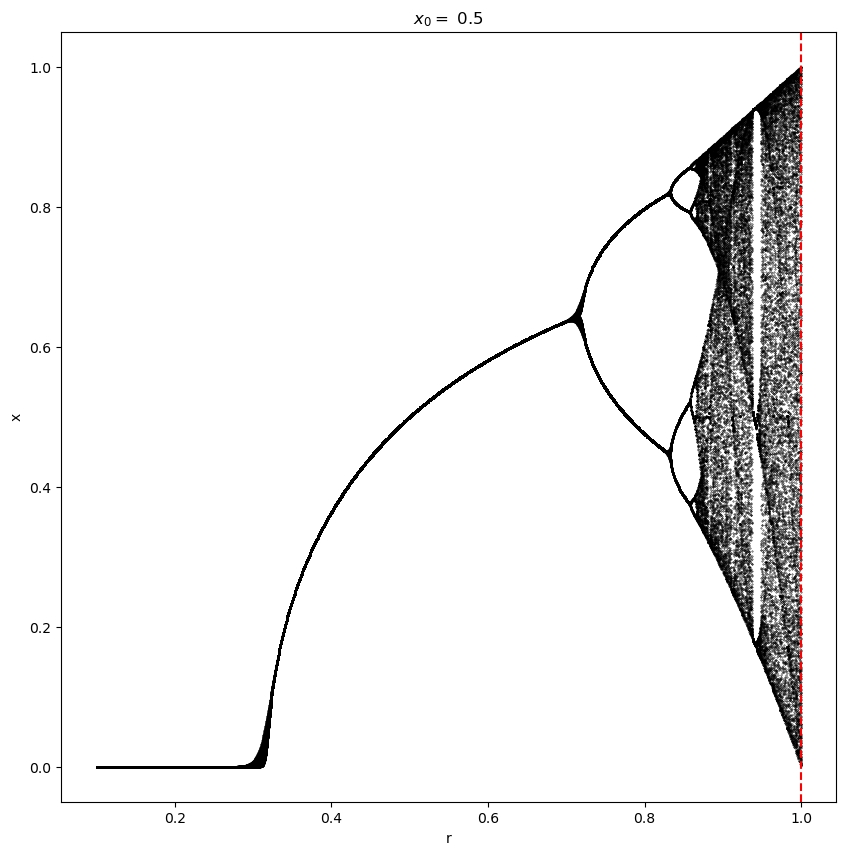

In [4]:
x0 = 0.5
n_last = 150
r_values = np.linspace(0.1, 1.0, 1500)

# Initialize arrays to store plot data
x_plot = []
y_plot = []

for r in r_values:
    tr = trajectory(r, 200, x0)
    y = tr[-n_last:]

    x_plot.extend([r] * n_last)
    y_plot.extend(y)

# Now plot all points at once
plt.figure(figsize=(10, 10))
plt.scatter(x_plot, y_plot, s=0.1, c='black')

# Vertical line at r = 1
plt.axvline(x=1, color='r', linestyle='--')

plt.title('$x_0 = $ ' + str(x0))
plt.xlabel('r')
plt.ylabel('x')
plt.show()

Zooming in to a more narrow range of $r$

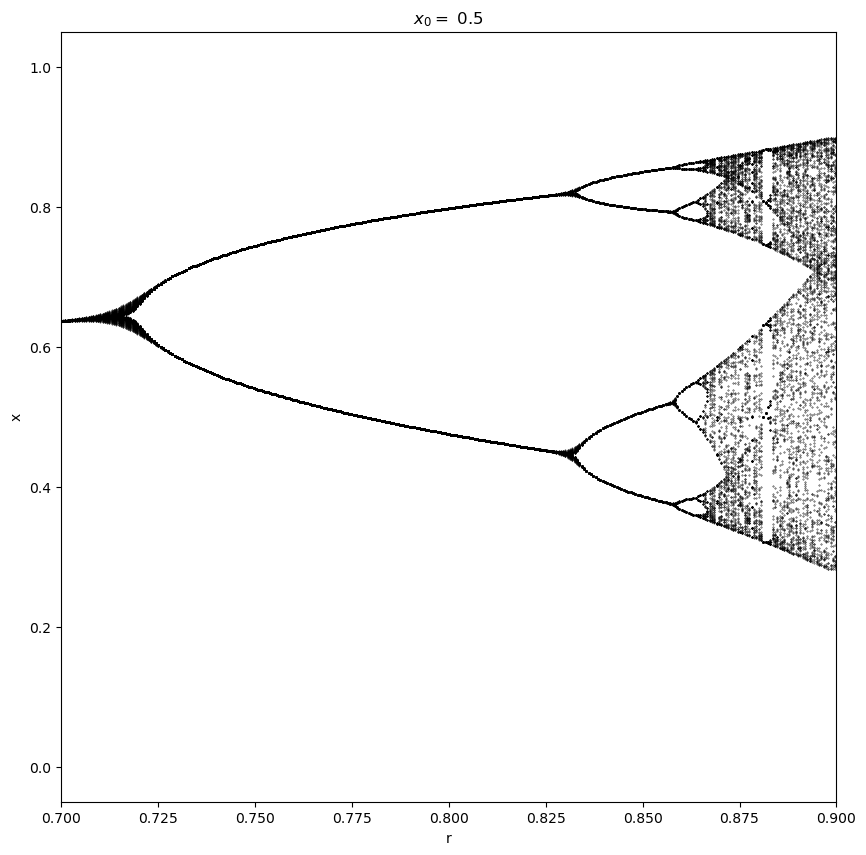

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(x_plot, y_plot, s=0.1, c='black')


plt.title('$x_0 = $ ' + str(x0))
plt.xlabel('r')
plt.ylabel('x')

plt.xlim(0.7, 0.9)
plt.show()

## Ex 1.2


1.2 For r = 0.6, iterate the map for at least 5 initial values randomly chosen between (0, 1). What do you observe? Then repeat for r = 0.72 and 0.75. What do you observe in your plot of xn against increasing r values?



### r = 0.6

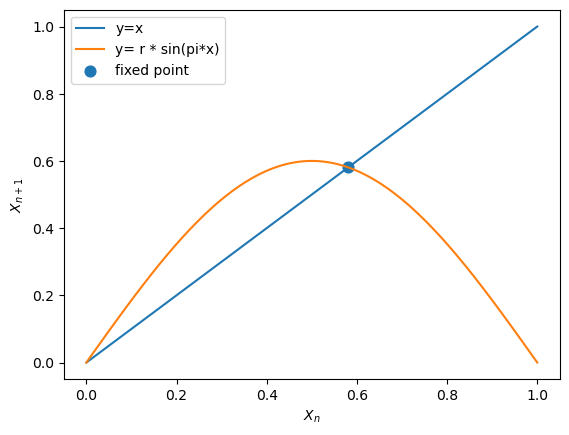

In [6]:
x = np.linspace(0, 1, 100)
r = 0.6
solution = find_fixed_point(r)
plt.plot(x, x, label='y=x')
plt.plot(x, sin_map(x , r), label='y= r * sin(pi*x)')
plt.scatter(solution, solution, s=60 , label='fixed point')

plt.xlabel('$X_n$')
plt.ylabel('$X_{n+1}$')

plt.legend()

Let's study the stability of the FP

In [7]:
print(sin_map_prime(0.,r) ,sin_map_prime(solution, r))

1.8849555921538759 [-0.47325162]


therefore zero is unstable (the abs value of the multiplier is larger than 1) while the other FP is stable

Text(0, 0.5, '$X_{n}$')

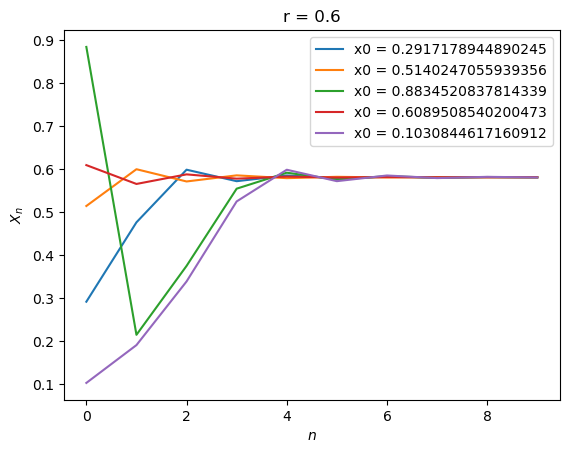

In [8]:
# randomly choose 5 values of x0 beween 0 and 1
x0 = np.random.random(5)
trajs = []

for s in x0:
    trajs.append( trajectory(r, 10, s))

for traj in trajs:
    plt.plot(traj, label = 'x0 = ' + str(traj[0]))
plt.legend()
plt.title('r = ' + str(r))
plt.xlabel('$n$')
plt.ylabel('$X_{n}$')

All trajectories converge to value x_final

In [9]:
print(trajs[0][-1])

0.5806828076269304


### r = 0.72

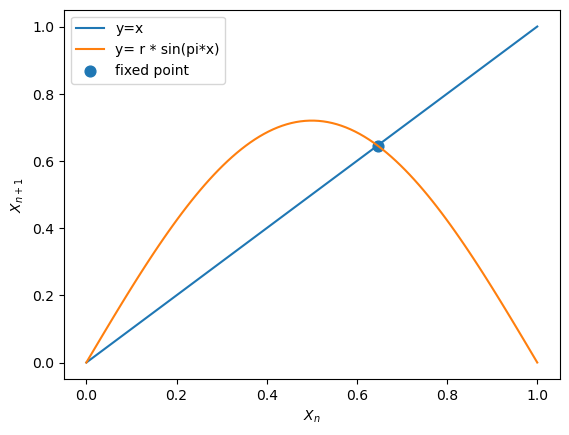

In [10]:
x = np.linspace(0, 1, 100)
r2 = 0.72
plt.plot(x, x, label='y=x')
plt.plot(x, sin_map(x , r2), label='y= r * sin(pi*x)')
solution2 = find_fixed_point(r2)
plt.scatter(solution2, solution2, s=60 , label='fixed point')

plt.xlabel('$X_n$')
plt.ylabel('$X_{n+1}$')

plt.legend()

Both the fixed points are unstable!

In [11]:
print(sin_map_prime(0.,r2) ,sin_map_prime(solution2, r2))

2.261946710584651 [-1.00016274]


Text(0, 0.5, '$X_{n}$')

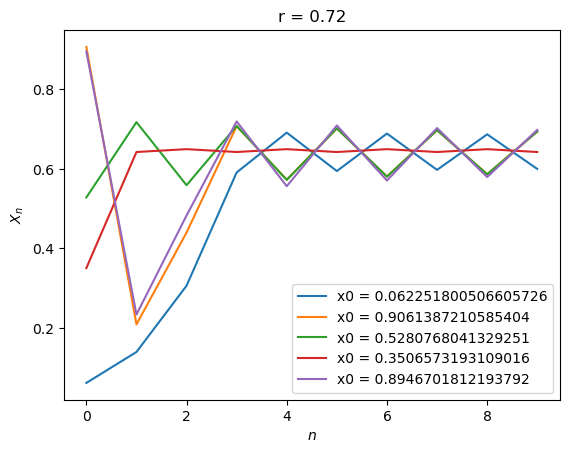

In [12]:
x0 = np.random.random(5)
trajs = []

for s in x0:
    trajs.append( trajectory(r2, 10, s))

for traj in trajs:
    plt.plot(traj, label = 'x0 = ' + str(traj[0]))
plt.legend()
plt.title('r = ' + str(r2))

plt.xlabel('$n$')
plt.ylabel('$X_{n}$')

### r = 0.75

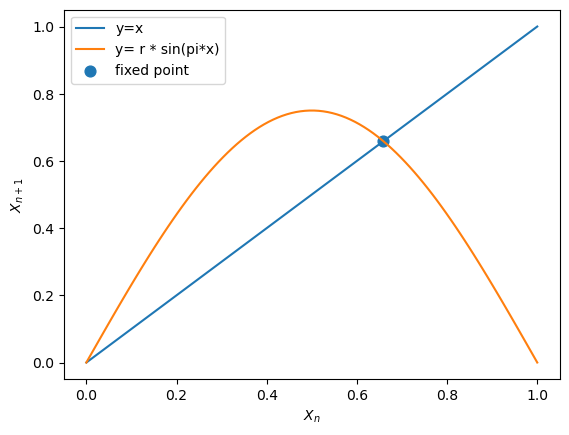

In [13]:
x = np.linspace(0, 1, 100)
r3 = 0.75
plt.plot(x, x, label='y=x')
plt.plot(x, sin_map(x , r3), label='y= r * sin(pi*x)')
solution3 = find_fixed_point(r3)
plt.scatter(solution3, solution3, s=60 , label='fixed point')

plt.xlabel('$X_n$')
plt.ylabel('$X_{n+1}$')

plt.legend()

Both FP are unstable!

In [14]:
print(sin_map_prime(0.,r3) ,sin_map_prime(solution2, r3))

2.356194490192345 [-1.04183619]


Text(0, 0.5, '$X_{n}$')

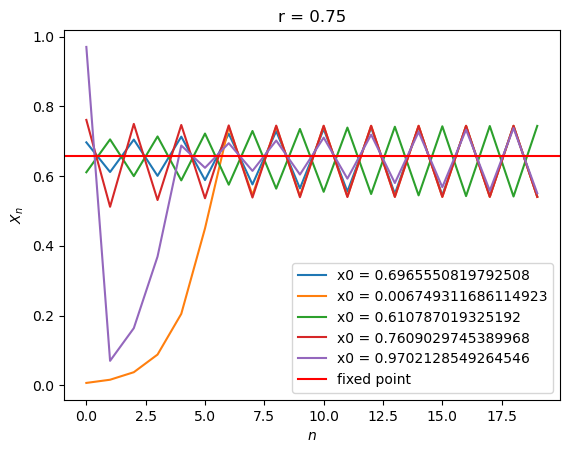

In [15]:
x0 = np.random.random(5)
trajs = []

for s in x0:
    trajs.append( trajectory(r3, 20, s))

for traj in trajs:
    plt.plot(traj[:], label = 'x0 = ' + str(traj[0]))
#plot orizontal line
plt.axhline(y=solution3, color='r', linestyle='-', label='fixed point')

plt.legend()
plt.title('r = ' + str(r3))

plt.xlabel('$n$')
plt.ylabel('$X_{n}$')

In [16]:
# taking the 2 asymptotic values
v1 = trajs[0][-1]
v2 = trajs[0][-2]

### Understanding 2-periodic solutions with second-iterate maps

We can understand this period 2 solution looking at the second-iterate map: this is a map that instead of sending to the future x_n by one time unit, it sends it by 2 time units:

basically the original map $f$ reads:
$$
x_{n+1} = f(x_{n})
$$
while if we re-applying the map we get the second-iterate map *$g$*:
$$
x_{n+2} = f(x_{n+1}) = f(f(x_{n})) = g(x_{n})
$$
Studying this map, we have 3 fixed point, where the one we found earlier is unstable, while the other two are stable (from the plot we can see that the derivative at the intersection with y = x is close to zero)

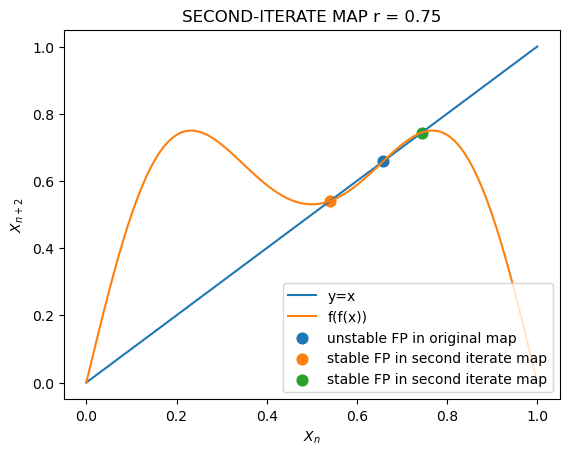

In [17]:
# plot second degree map

x = np.linspace(0, 1, 100)
r3 = 0.75
plt.plot(x, x, label='y=x')
plt.plot(x, sin_map(sin_map(x , r3), r3), label='f(f(x))')
solution3 = find_fixed_point(r3)
plt.scatter(solution3, solution3, s=60 , label='unstable FP in original map')
plt.scatter(v1, v1, s=60 , label='stable FP in second iterate map')
plt.scatter(v2, v2, s=60 , label='stable FP in second iterate map')

plt.title('SECOND-ITERATE MAP r = ' + str(r3))

plt.xlabel('$X_n$')
plt.ylabel('$X_{n+2}$')

plt.legend()


## Ex. 1.3

Keep increasing r, and plot the iterates produced. At what r value does “chaos” set in for the sine map? i.e., when does a (nearly) infinite number of fixed points appears (cp. Logistic map shown in the figure below, for which lambda ~ 3.6 is the transition to chaos. Note that lambda in the logistic map plays the role of r for the sine map.) Do you observe any “stability windows” in which the number of fixed points is small? (cp. Logistic map for lambda ~ 3.82, where only 3 fixed points appear.)

Chaos emerges aroud r = 0.86

theoretical values of $r_{\inf} = r_0 + \Delta_0 \Sigma_{n=0} \frac{1}{\delta^n}$


If we allow r > 1, then we can see regions of stability near r = 1.1 and 1.6, but these are outside the range of the current map

## EXTRA: Interactive plots

In [18]:
# now plot the map for with a number of times


def plot_map(r):
    x = np.linspace(-1, 1, 1000)

    plt.figure(figsize=(15, 5))
    plt.suptitle('maps')

    plt.subplot(1, 2, 1)
    plt.plot(x, x, label='y=x')
    plt.plot(x, sin_map(x , r), label='f(x)')
    plt.title('number of FP changes with r = ' + str(r))
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, x, label='y=x')
    plt.plot(x, sin_map(sin_map(x , r),r), label='f(f(x))')
    plt.title('SECOND-ITERATE MAP r = ' + str(r))
    plt.legend()


interact(plot_map, r=(0.1, 1.0, 0.01))


interactive(children=(FloatSlider(value=0.55, description='r', max=1.0, min=0.1, step=0.01), Output()), _dom_c…

<function __main__.plot_map(r)>

Here we plot two trajectories, with very similar but not identical initial conditions: on the onset of chaos this trajectories start to diverge from each other

In [19]:
trajectory(r, 10, s)
x0 = 0.5
x02 = 0.51

def plot_map(r):


    plt.figure(figsize=(15, 5))
    plt.suptitle('maps')
    tr = trajectory(r, 1000, x0)
    tr2 = trajectory(r, 1000, x02)
    # plt.subplot(1, 2, 1)

    plt.plot(tr[-20:], label='x0 = ' + str(tr[0]))
    plt.plot(tr[-20:], 'o')


    plt.plot(tr2[-20:], label='x0 = ' + str(tr2[0]))
    plt.plot(tr2[-20:], 'o')

    plt.xlabel('n')
    plt.ylabel('$X_n$')
    plt.legend()
  


interact(plot_map, r=(0.1, 2.0, 0.01))

interactive(children=(FloatSlider(value=1.05, description='r', max=2.0, min=0.1, step=0.01), Output()), _dom_c…

<function __main__.plot_map(r)>

# Ex 2

## Ex 2.1

 Extend your code to output the iterates from the sine map for a sequence of r values between 0.1 and 1, taking at least 20 values, and randomly setting the initial point for each one. Plot the fixed point(s) on the Y axis against the r value on the X axis, so you get a plot similar to the one above.
Then repeat this accurately enough that you can estimate the successive r values at which the number of fixed points doubles (you may need more than 20 values of r, and you may need to zoom in on small portions of the r-axis to get sufficient accuracy. So you’ll need to examine many little graphs across the r axis to locate the values of r where the period doubling occurs.

### Estimating Feigenbaum numbers:  

The true values, we want to find ratio values that are similar to the theoretical ones

$\delta$ = 0.6692..  
$\alpha$ = 2.503...

For the case of the $\delta$ constant, we just need to fidn approximately when the branching happens. b1 b2 and b3 have been found by a trial and error

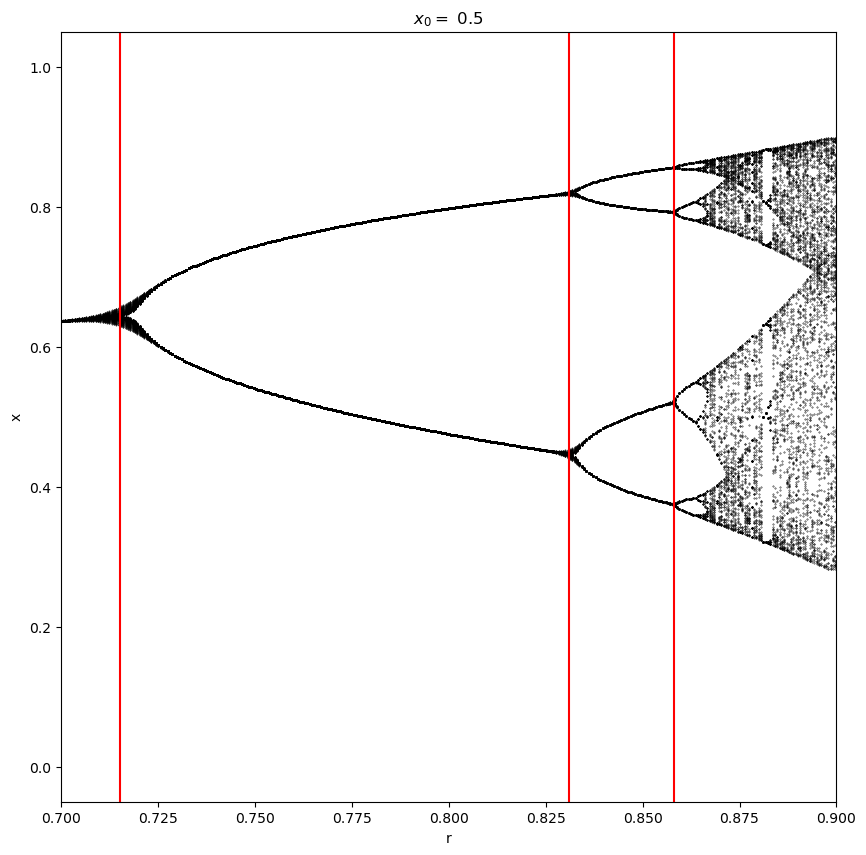

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(x_plot, y_plot, s=0.1, c='black')


plt.title('$x_0 = $ ' + str(x0))
plt.xlabel('r')
plt.ylabel('x')

plt.xlim(0.7, 0.9)

# vertical lines
b1= 0.715
b2= 0.831
b3= 0.858

plt.axvline(x=b1, color='r', linestyle='-')
plt.axvline(x=b2, color='r', linestyle='-')
plt.axvline(x=b3, color='r', linestyle='-')

# horizontal line
# plt.axhline(y=0.82, color='r', linestyle='-', c = 'blue')
# plt.axhline(y=0.445, color='r', linestyle='-', c = 'blue')
# plt.axhline(y=0.445, color='r', linestyle='-', c = 'blue')
plt.show()

$$
\delta \approx \frac{b2 - b1}{b3 - b2}
$$

In [21]:
delta = (b2 - b1) / (b3 - b2)
delta

4.296296296296292

In order to find the $\alpha$ constant we use the rule depicted in the image below.  
(this image actually represents the logistic map bifurcatio diagram, that's why the x scale and the x axis label are different: ignore these differences)

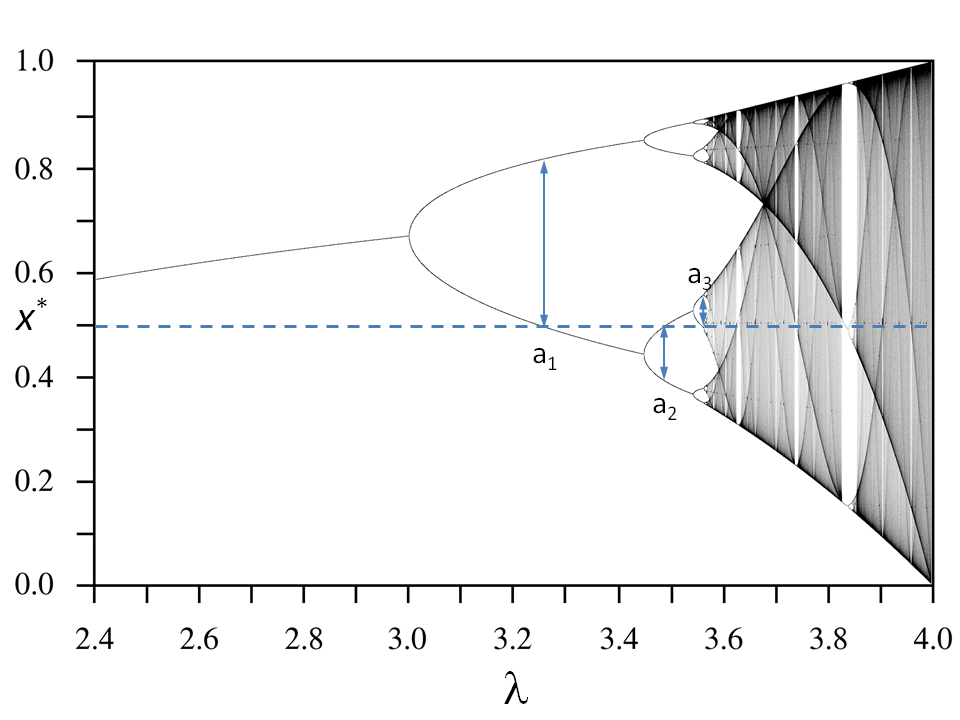

$$
\alpha \approx \frac{a_1}{a_2}

$$

## Ex 2.2

How many successive splittings can you measure accurately enough to get values for the Feigenbaum numbers?

Being a fractal with enough resolution and zooming in we could mesure infinite, due to computational power and feasibility we are measuring only the first 2/3

## Ex 2.3

Say how your estimates of the Feigenbaum numbers for the sine map compare with those for the logistic map shown in the figure.

The Feigenbaum numbers are remarkably the same !

# Ex 3:  Fractal dimension of the sine map

## Ex 3.1

Find a value of r such that you get a lot of fixed points (i.e., you are in a region for the sine map corresponding to the region r ~ 3.95 for the logistic map). Generate 10,000 points from a randomly-chosen initial point x0, and write them to a file. Discard the first 5,000. Duplicate the data into a second column shifting each value by one. So, for each row in the file, column one contains xn, and column two contains xn+1. Plot xn+1 against xn.

Text(0, 0.5, '$X_{n+1}$')

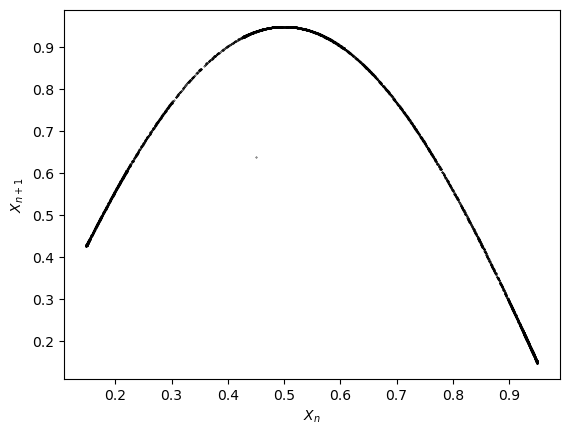

In [22]:
x0 = 0.5
r_chaos = 0.95
# r_chaos = 0.75

x0 = 0.5
x0_2 = 0.5001
tr = trajectory(r_chaos, 10000, x0)


# discard first half of the trajectory
tr = tr[5000:]
tr_shifted = np.roll(tr, -1)

plt.scatter(tr, tr_shifted, s= 0.1, c = 'black')
# plt.scatter(tr2, tr2_shifted, s= 0.1, c = 'red')

plt.xlabel('$X_n$')
plt.ylabel('$X_{n+1}$')
# plt.plot(tr, tr_shifted)

## Ex 3.2

For the 50,000 points from section 3.1, and for a series of values of $\epsilon = 1, 0.5, 0.25, \frac{1}{2^n} \ldots$, create a histogram of the number of points within a distance $\epsilon$ of $x_i$ for a sequence of values of $x_i$ ranging from 0 to 1. Then average the number of points in all the bins for each $x_i$ value, to get an average $\langle N(\epsilon) \rangle$ for the number of points that lie in bins of size $\epsilon$ across the set of points. Repeat this for each $\epsilon$.

Plot $\ln(\langle N(\epsilon) \rangle)$ against $\ln(\epsilon)$ and measure the slope to obtain the “fractal dimension” of the fixed points of the sine map for a single $r$ value.

What is the distribution of fixed points for this value of $r$?


In [23]:
# seq = np.linspace(0, r_chaos, 100)
seq = tr
eps = [1/2**n for n in range(1, 15)]

# now i want a function that counts the number of point of trajectory that are within eps radius from each point of seq

def count_points(tr, eps):
    '''
    Count the number of points of tr that are within eps radius from each point of tr
    '''
    # compute the distance between each point of tr, getting a matrix
    dist = np.abs(tr[:, None] - tr[None, :])
    # count how many points are within eps radius from each point of seq 
    count = np.sum(dist < eps, axis=0)

    return count.mean()

count_points(tr, eps[13])
N_eps = [count_points(tr, eps[i]) for i in range(len(eps))]
N_eps

[3819.4172,
 2172.194,
 1336.2544,
 869.0756,
 548.44,
 321.2628,
 181.7256,
 101.6688,
 57.2212,
 31.7568,
 17.4712,
 9.7088,
 5.4796,
 3.2564]

slope =  0.790635501771883


Text(0.5, 1.0, 'r = 0.95 slope = 0.790635501771883')

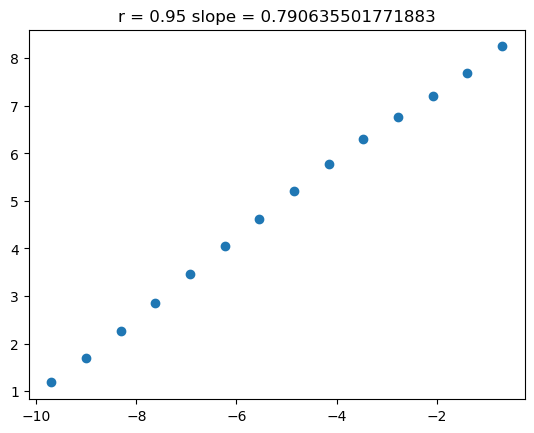

In [24]:
# linear regression

reg = LinearRegression().fit(np.log(eps).reshape(-1, 1), np.log(N_eps).reshape(-1, 1))
# plot slope and intercept
# reg.coef_, reg.intercept_
slope = reg.coef_[0][0]
print('slope = ', reg.coef_[0][0])

plt.plot(np.log(eps), np.log(N_eps), 'o')
plt.title('r = ' + str(r_chaos) + ' slope = ' + str(slope))

In [25]:
def fractal_dimension(tr, eps):
    N_eps = [count_points(tr, eps[i]) for i in range(len(eps))]
    reg = LinearRegression().fit(np.log(eps).reshape(-1, 1), np.log(N_eps).reshape(-1, 1))
    return reg.coef_[0][0]

EXTRA: fractal dimension as function of $r$  

WARNING: it could take minuts to run next cell

In [26]:
fr_dim = []

rangee = np.linspace(0., 1., 25)
for r in rangee:
    #print(r)
    seq = np.linspace(0, r, 20)
    tr = trajectory(r, 10000, x0)
    tr = tr[5000:]
    fd = fractal_dimension(tr, eps)
    fr_dim.append(fd)

Text(0, 0.5, 'fractal dimension')

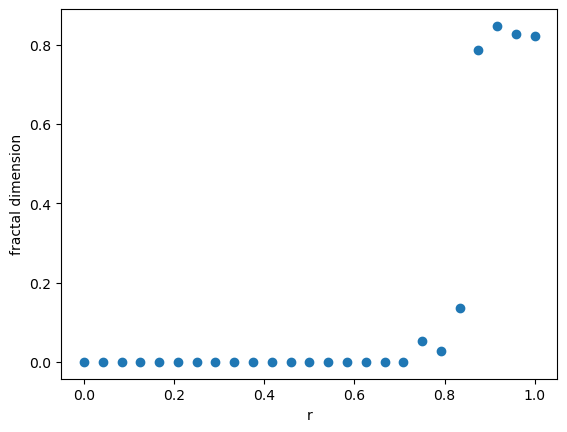

In [27]:
plt.plot(rangee, fr_dim, 'o')
plt.xlabel('r')
plt.ylabel('fractal dimension')

# Ex 4: Universality in chaos

Add a new function to your code from Section 1.0, that iterates the logistic map:  
$$
  x_{n+1} = \lambda x_n (1–x_n)
$$

where λ is in the range(0,4),and $x_0$ is in the range(0,1).Note that I have used rand λ because they have different allowed ranges.

## ex 4.1

Choose values of $r$ and $\lambda$ near the beginning of their range (but not zero), and plot the first iterate obtained from both maps on the same graph, i.e., if $f(x)$ is the logistic map and $g(x)$ is the sine map, plot $f(x_0)$ and $g(x_0)$ for many $x_0$ between 0 and 1. What do you observe? Can you find values of $r$, $\lambda$ so that the curves nearly overlap?
    

In [28]:
from scipy.optimize import fsolve
import numpy as np

def logistic_map(x, lamb):
    '''
    Logistic map
    '''
    return lamb * x * (1 - x)

In [29]:
def trajectory_log(lamb, N, x0):
    '''
    Compute the trajectory of the logistic map
    '''
    x = np.zeros(N)
    x[0] = x0
    for i in range(1, N):
        x[i] = logistic_map(x[i-1], r)
    return x

In both the sin and logistic map, the maximum value occurs at x=1/2 (check yourself taking the derivative with respect to X)  
However the height of this values changes in the two maps:  
- Log_map(x=1/2) = r/4
- Sin_map(x=1/2) = r
  
We will see that this factor 4 will come up in the bifurcation diagram, as the distance between the first two bifurcation points is 4 times larger than the sin map case

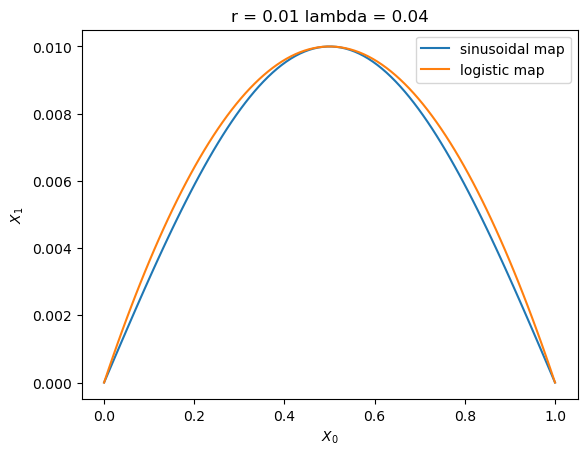

In [30]:
r = 0.01
lambdaa = 0.04

x0s = np.linspace(0, 1, 100)

x1s_sin =sin_map(x0s, r)
x1s_log = logistic_map(x0s, lambdaa)

plt.plot(x0s, x1s_sin, label='sinusoidal map')
plt.plot(x0s, x1s_log, label='logistic map')

plt.xlabel('$X_0$')
plt.ylabel('$X_1$')

plt.title('r = ' + str(r) + ' lambda = ' + str(lambdaa))

plt.legend()


What property of the map functions do you think is necessary for two discrete maps to have similar long-time behaviour (referred to in the literature as being in the same universality class)?
\end{enumerate}


They both have bump between 0 and 1, and the height of teh bump doesnt exceed 1 (when lambda<4 and r<1)

## Ex 4.2

Comment on how your bifurcation curve for the sine map compares to that obtained from the logistic map shown above.

Text(0, 0.5, '$ \\lambda $ ')

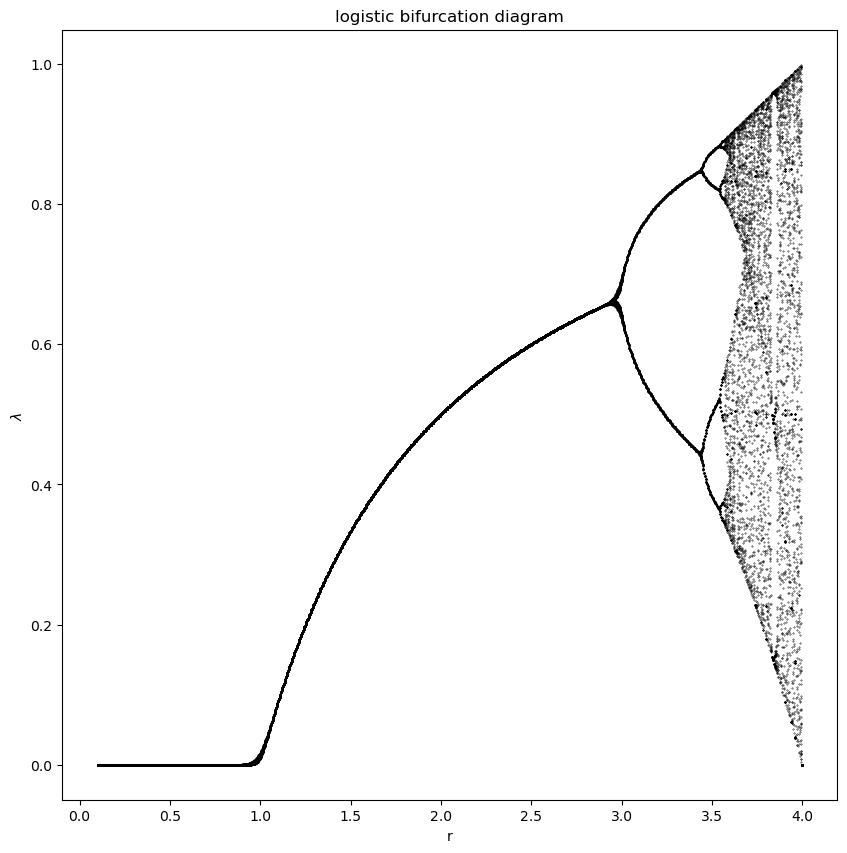

In [31]:
x0 = 0.5
n_last = 50

plt.figure(figsize=(10, 10))
for r in np.linspace(0.1, 4.0, 1000):

    x = np.ones(n_last)*r
    tr = trajectory_log(r, 100, x0)
    y = tr[-n_last:]

    plt.scatter(x, y, s=0.1, c = 'black')

plt.title('logistic bifurcation diagram')
plt.xlabel('r')
plt.ylabel('$ \lambda $ ')

The bifurcation curve looks exactly the same, however the distance between the bifurcation points is 4 times bigger. The Feigenbaum number is the same though.



## Ex 4.3

What implications does this have for using simple maps like the logistic map for making predictions about complex natural system such as turbulent flow of fluids?

They serve as toy models that exhibit the same qualitative features of chaos as found in complex models within the same universality class as the 1D models.